# Cleaning Running Back Dataset

Author: Ermina Mujan

Date: April 19, 2021

This dataset is from kaggle user mur418. It contains data on NFL running backs for 2019 actuals and 2020 projections

### Import packages and data

In [1]:
import pandas as pd # we are using pandas for data manipulation and analysis

import missingno as msno # we are using missingno to visualize the distribution of NaN(Not a Number) values

In [2]:
# bring in the running back dataset as a pandas dataframe 

df = pd.read_csv('../../fixtures/raw_data/rb_stats_and_projections_kaggle.csv')

### Inspect the dataset's shape, head, and column names

In [3]:
# see how many rows and columns are in this dataset

shape_info = df.shape # set the dataframe's "shape" to a variable

In [18]:
print('This dataset evaluates {} running backs based on data from {} columns' # print this phrase with variables added in
      .format(shape_info[0], # using the .format method, insert the number of rows in the dataframe
              shape_info[1])) # using the .format method, insert the number of columns in the dataframe

This dataset evaluates 255 running backs based on data from 21 columns


In [5]:
df.head() # look at the first 5 rows of the running back dataset

,Unnamed: 0,PLAYER NAME,TEAM NAME,PLAYER POSITION,2019 CAR,2019 RUSH YDS,2019 RUSH AVG,2019 RUSH TD,2019 REC,2019 REC YDS,...,2019 FPTS,2020 CAR,2020 RUSH YARDS,2020 RUSH AVG,2020 RUSH TD,2020 REC,2020 REC YDS,2020 REC TD,2020 FPTS,Player OUTLOOK
0,1,Christian McCaffrey,Panthers,RB,287.0,1387.0,4.8,15.0,116.0,1005.0,...,471.20,233.0,1048.0,4.5,9.0,90.0,736.0,3.0,333.95,McCaffrey returns as the feature back in Carol...
1,2,Ezekiel Elliott,Cowboys,RB,301.0,1357.0,4.5,12.0,54.0,420.0,...,311.70,282.0,1244.0,4.4,10.0,57.0,455.0,2.0,300.76,Elliott returns as the clear feature back in D...
2,3,Saquon Barkley,Giants,RB,217.0,1003.0,4.6,6.0,52.0,438.0,...,244.10,261.0,1176.0,4.5,10.0,57.0,458.0,3.0,292.33,Barkley's 2019 season fell short of lofty expe...
3,4,Dalvin Cook,Vikings,RB,250.0,1135.0,4.5,13.0,53.0,519.0,...,292.40,245.0,1051.0,4.3,10.0,64.0,536.0,1.0,291.72,Cook's career has thus far been marred by inju...
4,5,Alvin Kamara,Saints,RB,171.0,797.0,4.7,5.0,81.0,533.0,...,248.52,194.0,876.0,4.5,8.0,78.0,600.0,3.0,290.39,Kamara is coming off an up-and-down 2019 campa...


In [6]:
df.tail() # look at the last 5 rows of the running back dataset

,Unnamed: 0,PLAYER NAME,TEAM NAME,PLAYER POSITION,2019 CAR,2019 RUSH YDS,2019 RUSH AVG,2019 RUSH TD,2019 REC,2019 REC YDS,...,2019 FPTS,2020 CAR,2020 RUSH YARDS,2020 RUSH AVG,2020 RUSH TD,2020 REC,2020 REC YDS,2020 REC TD,2020 FPTS,Player OUTLOOK
250,251,Marshawn Lynch,FA,RB,12.0,34.0,2.8,1.0,0.0,0.0,...,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.
251,252,Darren Sproles,Eagles,RB,17.0,66.0,3.9,0.0,6.0,24.0,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.
252,253,LeSean McCoy,FA,RB,101.0,465.0,4.6,4.0,28.0,181.0,...,118.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.
253,254,Alex Barnes,Titans,RB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.
254,255,Austin Walter,Giants,RB,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.


In [7]:
list(df) # listing all column names

['Unnamed: 0',
 'PLAYER NAME',
 'TEAM NAME',
 'PLAYER POSITION',
 '2019 CAR',
 '2019 RUSH YDS',
 '2019 RUSH AVG',
 '2019 RUSH TD',
 '2019 REC',
 '2019 REC YDS',
 '2019 REC TDS',
 '2019 FPTS',
 '2020 CAR',
 '2020 RUSH YARDS',
 '2020 RUSH AVG',
 '2020 RUSH TD',
 '2020 REC',
 '2020 REC YDS',
 '2020 REC TD',
 '2020 FPTS',
 'Player OUTLOOK']

### Begin cleaning the dataset by improving readability of column names and dropping unnecessary columns and rows

In [8]:
# Dropping the following columns: 'Unnamed: 0' and 'Player OUTLOOK'

df = df.drop(['Unnamed: 0', 'Player OUTLOOK',], axis=1) 

In [9]:
# shows how many many columns have been deleted

new_shape = df.shape[1]

print('{} columns have been removed from the dataset'
      .format( abs(new_shape-shape_info[1])))

2 columns have been removed from the dataset


In [10]:
# removing spaces from old column names

df_old_cols = list(df) # instantiate a new list with old column names in it

df_new_cols = [x.replace(" ", "").capitalize() for x in df_old_cols] # remove the spaces and make everything lowercase

In [11]:
df_new_cols[0] # make sure it worked by checking the first name

'Playername'

In [12]:
df.columns = df_new_cols # make df_new_cols the column names

df.head() # check to make sure that this change stuck

,Playername,Teamname,Playerposition,2019car,2019rushyds,2019rushavg,2019rushtd,2019rec,2019recyds,2019rectds,2019fpts,2020car,2020rushyards,2020rushavg,2020rushtd,2020rec,2020recyds,2020rectd,2020fpts
0,Christian McCaffrey,Panthers,RB,287.0,1387.0,4.8,15.0,116.0,1005.0,4.0,471.20,233.0,1048.0,4.5,9.0,90.0,736.0,3.0,333.95
1,Ezekiel Elliott,Cowboys,RB,301.0,1357.0,4.5,12.0,54.0,420.0,2.0,311.70,282.0,1244.0,4.4,10.0,57.0,455.0,2.0,300.76
2,Saquon Barkley,Giants,RB,217.0,1003.0,4.6,6.0,52.0,438.0,2.0,244.10,261.0,1176.0,4.5,10.0,57.0,458.0,3.0,292.33
3,Dalvin Cook,Vikings,RB,250.0,1135.0,4.5,13.0,53.0,519.0,0.0,292.40,245.0,1051.0,4.3,10.0,64.0,536.0,1.0,291.72
4,Alvin Kamara,Saints,RB,171.0,797.0,4.7,5.0,81.0,533.0,1.0,248.52,194.0,876.0,4.5,8.0,78.0,600.0,3.0,290.39


### Find and determine what to do with values that are "NaN" (Not a Number)

<AxesSubplot:>

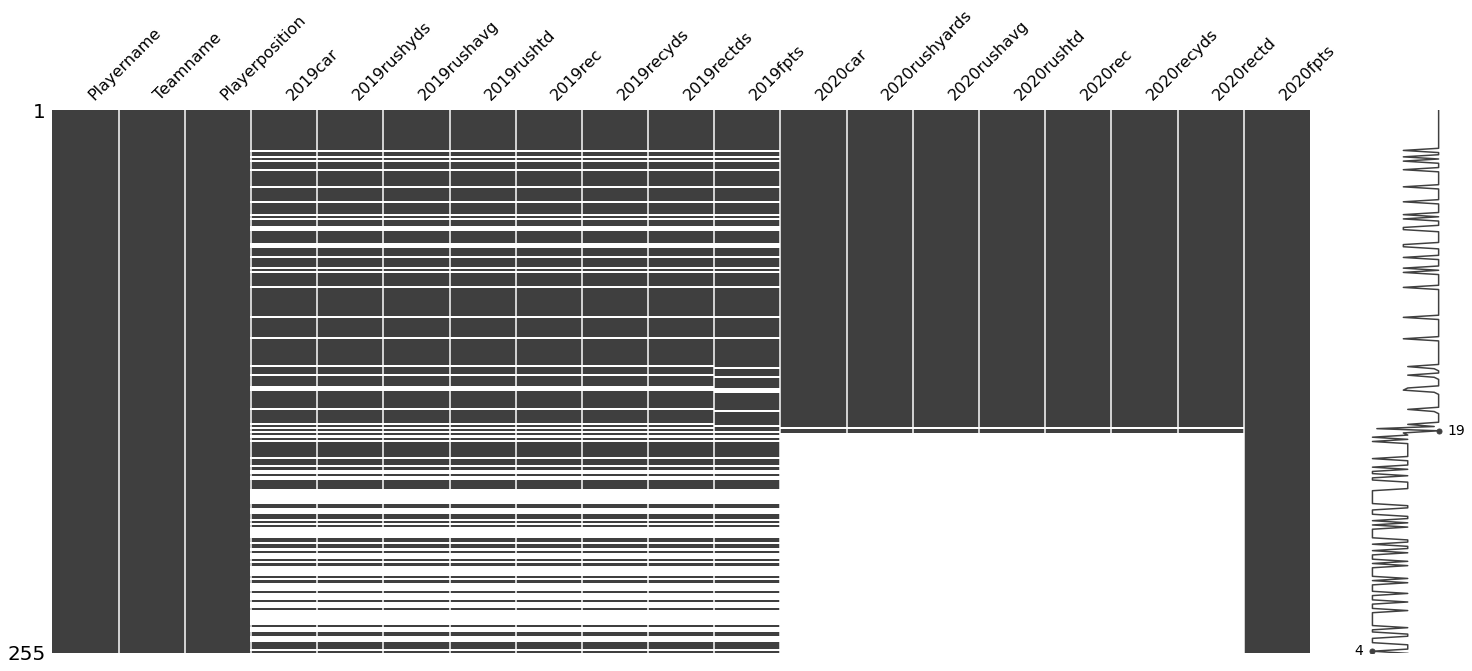

In [13]:
msno.matrix(df) # print a missing numbers matrix to show where missing numbers are

In [14]:
df[df['2019fpts'].isna()] # shows missing values from '2019fpts' column

,Playername,Teamname,Playerposition,2019car,2019rushyds,2019rushavg,2019rushtd,2019rec,2019recyds,2019rectds,2019fpts,2020car,2020rushyards,2020rushavg,2020rushtd,2020rec,2020recyds,2020rectd,2020fpts
19,Clyde Edwards-Helaire,Chiefs,RB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.0,749.0,4.4,6.0,39.0,330.0,3.0,199.32
22,D'Andre Swift,Lions,RB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184.0,769.0,4.2,5.0,35.0,283.0,1.0,175.87
24,Jonathan Taylor,Colts,RB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198.0,852.0,4.3,7.0,24.0,204.0,1.0,174.41
28,Ke'Shawn Vaughn,Buccaneers,RB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.0,663.0,4.2,5.0,32.0,245.0,1.0,157.60
36,Cam Akers,Rams,RB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,708.0,4.2,7.0,22.0,180.0,1.0,154.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Stevan Ridley,FA,RB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
247,Jamaal Charles,FA,RB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
248,LeGarrette Blount,FA,RB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
249,Jonathan Stewart,FA,RB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [15]:
df = df.fillna(0) # use the .fillna() method to fill the NaNs with zeros

In [16]:
df.tail() # check out the last 5 rows in the dataset to ensure this filling of null values stuck

,Playername,Teamname,Playerposition,2019car,2019rushyds,2019rushavg,2019rushtd,2019rec,2019recyds,2019rectds,2019fpts,2020car,2020rushyards,2020rushavg,2020rushtd,2020rec,2020recyds,2020rectd,2020fpts
250,Marshawn Lynch,FA,RB,12.0,34.0,2.8,1.0,0.0,0.0,0.0,9.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,Darren Sproles,Eagles,RB,17.0,66.0,3.9,0.0,6.0,24.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252,LeSean McCoy,FA,RB,101.0,465.0,4.6,4.0,28.0,181.0,1.0,118.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253,Alex Barnes,Titans,RB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,Austin Walter,Giants,RB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Export the dataframe to a csv

In [17]:
df.to_csv('../../fixtures/cleaned_data/cleaned_rb_stats_and_projections.csv')